In [1]:
# MNIST data 로드하기
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# Normalization
import numpy as np
print (np.min(x_train), np.max(x_train))
print (np.min(x_test), np.max(x_test))

0 255
0 255


In [4]:
x_tr = x_train / 255.
x_te = x_test / 255.

print (np.min(x_tr), np.max(x_tr))
print (np.min(x_te), np.max(x_te))

0.0 1.0
0.0 1.0


In [5]:
# 2D data -> 1D data
print (x_tr.shape)
print (x_te.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_tr = x_tr.reshape(x_tr.shape[0], x_tr.shape[1]*x_tr.shape[2])
x_te = x_te.reshape(x_te.shape[0], x_te.shape[1]*x_te.shape[2])

print (x_tr.shape)
print (x_te.shape)

(60000, 784)
(10000, 784)


In [7]:
# label => one-hot vector
print (y_train.shape, y_test.shape)

(60000,) (10000,)


In [8]:
from keras.utils import to_categorical

y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)

print (y_tr.shape, y_te.shape)

(60000, 10) (10000, 10)


In [9]:
# FCN Model 생성하기

from keras.models import Sequential
from keras.layers import Dense

input_shape = x_tr.shape[1]

model = Sequential()

model.add(Dense(units=1024, activation='relu', input_dim=input_shape))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [10]:
# FCN Model training

history = model.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=10, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.2866 - acc: 0.9189 - val_loss: 0.1519 - val_acc: 0.9570
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1120 - acc: 0.9682 - val_loss: 0.0892 - val_acc: 0.9738
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0724 - acc: 0.9791 - val_loss: 0.0736 - val_acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0505 - acc: 0.9858 - val_loss: 0.0700 - val_acc: 0.9767
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0365 - acc: 0.9901 - val_loss: 0.0694 - val_acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0272 - acc: 0.9930 - val_loss: 0.0642 - val_acc: 0.9795
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0204 - acc: 0.9945 - val_loss: 0.0662 - val_ac

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


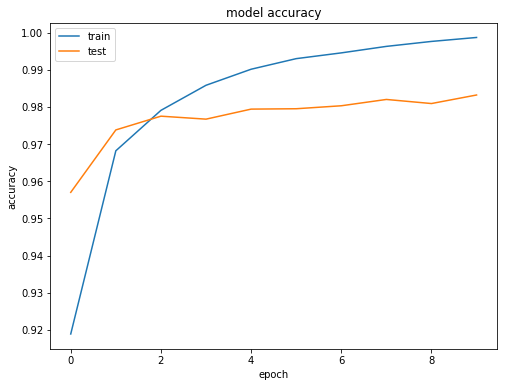

In [17]:
import matplotlib.pyplot as plt

print(history.history.keys())

# Accruacy graph 그리기
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

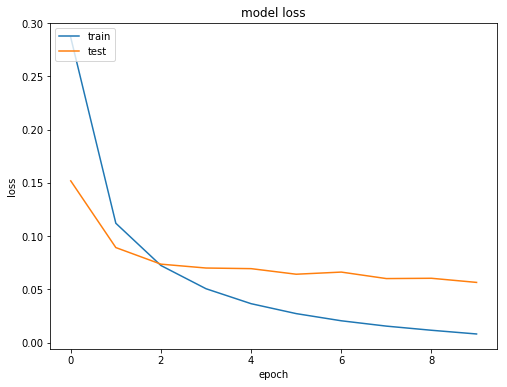

In [18]:
# loss graph 그리기
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()